In [100]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt
from ipywidgets import interact
import sys
from os import path

out_dir='cont_data_files/'

# parameters
hbar=1.05e-34
elec=1.6e-19
meV=elec*1e-3

vF=1e6
B=10 # Tesla
hwc=vF*sqrt(2*hbar*elec*B)
lB=np.sqrt(hbar/(elec*B))


def cond_plotter_vs_E(Nx,Lx,Ls,E_lead,params):
    
    nu=params['nu']
    m_n=params['m_n']
    mu_sc=params['mu_sc']
    m_sc=params['m_sc']
    
    D1=params['D1']
    D2=params['D2']

    lRx= params['lRx']
    lRy= params['lRy']
    lso= params['lso']
    gs= params['gs']
    gn= params['gn']
    f1='cond_paw_vs_E_Nx_%d_Lxs_%d_%d_nu_%.2f_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
          (Nx,Lx,Ls,nu,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
           D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)

#     f1='cond_vs_E_El_%.3f_Nx_%d_Lxs_%d_%d_nu_%.2f_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
#           (E_lead,Nx,Lx,Ls,nu,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
#            D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)
    
#     f1='cond_vs_mu_El_%.3f_Nx_%d_Lxs_%d_%d_nu_%.2f_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
#           (E_lead,Nx,Lx/lB,Ls/lB,nu,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
#            D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)
   
 #     f1='cond_vs_mu_Nx_%d_Lxs_%d_%d_nu_%.2f_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
#           (Nx,Lx/lB,Ls/lB,nu,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
#            D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)
    fname=out_dir+f1
    if path.exists(fname):
        npzfile = np.load(fname)
        Esw=npzfile['E_list']
        Ree=npzfile['Ree']
        Reh=npzfile['Reh']

    return Esw, Ree, Reh

def cond_plotter_vs_mu(Nx,Lx,Ls,E_lead,params):
    
    m_n=params['m_n']
    mu_sc=params['mu_sc']
    m_sc=params['m_sc']
    
    D1=params['D1']
    D2=params['D2']

    lRx= params['lRx']
    lRy= params['lRy']
    lso= params['lso']
    gs= params['gs']
    gn= params['gn']
    f1='cond_paw_vs_mu_Nx_%d_Lxs_%d_%d_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
      (Nx,Lx,Ls,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
       D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)


#     f1='cond_vs_mu_El_%.3f_Nx_%d_Lxs_%d_%d_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
#           (E_lead,Nx,Lx,Ls,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
#            D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)
   
 #     f1='cond_vs_mu_Nx_%d_Lxs_%d_%d_nu_%.2f_mn_%.2f_ms_%.2f_mus_%.2f_D12_%.2f_%.2f_lxys_%.2f_%.2f_%.2f_gsn_%.2f_%.2f.npz' %\
#           (Nx,Lx/lB,Ls/lB,nu,m_n/hwc,m_sc/hwc,mu_sc/hwc,\
#            D1/hwc,D2/hwc,lRx/hwc,lRy/hwc,lso/hwc,gs/hwc,gn/hwc)
    fname=out_dir+f1
    if path.exists(fname):
        npzfile = np.load(fname)
        nu_sw=npzfile['nu_list']
        Ree=npzfile['Ree']
        Reh=npzfile['Reh']

    return nu_sw, Ree, Reh

Response as a function of bias

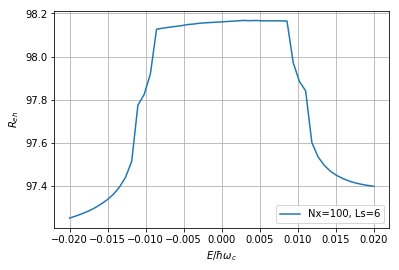

In [23]:
# system dimensions (in units of lB)
# Ls=6
Ls_list=[6]
Lx=8

D1=0.5*hwc #10*meV
D2=0.6*hwc #10*meV
m_n=0.*hwc

lRx= 1*hwc
lRy= 0.*hwc
lso= 0.*hwc
gs=0.0*hwc
gn=0.2*hwc

nu=0.4
m_sc=3*hwc 
mu_sc=8*hwc
params=dict(nu=nu, m_n=m_n, mu_sc=mu_sc, m_sc=m_sc, D1=D1, D2=D2,\
            lRx=lRx, lRy=lRy, lso=lso, gs=gs, gn=gn)

m_sc_lead=1000*hwc
mu_sc_lead=0*hwc
Nx_list=[100]
for Nx in Nx_list:
# E_list=[0.001,0.01,0.02]
# E_list=[0]
#     for E_lead in E_list:
    E_lead=0
    for Ls in Ls_list:
        Esw1, Ree1, Reh1 = cond_plotter_vs_E(Nx,Lx,Ls,E_lead,params)
#         l= 'Nx=%d, E=%.3f' % (Nx,E_lead)
        l= 'Nx=%d, Ls=%d' % (Nx,Ls)
        plt.plot(Esw1/hwc,Reh, label=l)

# plt.plot(Esw1/hwc,Reh1)
# plt.plot(Esw1/hwc,Ree1)
plt.legend()
plt.grid()
# plt.ylim(0,1.1)
plt.ylabel(r'$R_{eh}$')
plt.xlabel(r'$E/\hbar\omega_c $')
plt.show()

Response as a function of nu

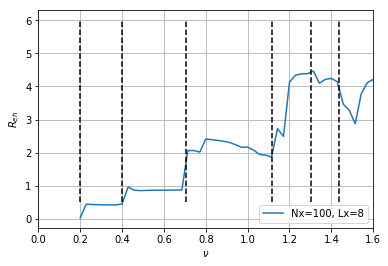

In [105]:
# system dimensions (in units of lB)
Lx_list=[8]
Ls=6

D1=0.5*hwc #10*meV
D2=0.6*hwc #10*meV
m_n=0.1*hwc

lRx= 1.*hwc
lRy= 0.*hwc
lso= 0.*hwc
gs=0.0*hwc
gn=0.3*hwc

m_sc=3*hwc 
mu_sc=8*hwc
params=dict(m_n=m_n, mu_sc=mu_sc, m_sc=m_sc, D1=D1, D2=D2,\
            lRx=lRx, lRy=lRy, lso=lso, gs=gs, gn=gn)

m_sc_lead=1000*hwc
mu_sc_lead=0*hwc
Nx_list=[100]
for Nx in Nx_list:
# E_list=[0]
#     for E_lead in E_list:
    E_lead=0
#     for Ls in Ls_list:
    for Lx in Lx_list:
        nusw1, Ree1, Reh1 = cond_plotter_vs_mu(Nx,Lx,Ls,E_lead,params)
#         l= 'Nx=%d, E=%.3f' % (Nx,E_lead)
#         l= 'Nx=%d, Ls=%d' % (Nx,Ls)
        l= 'Nx=%d, Lx=%d' % (Nx,Lx)
        plt.plot(nusw1,Reh1, label=l)
#         plt.plot(nusw1,-1/(2.3*Reh1), label=l)
#         plt.plot(nusw1,Ree1-Ree1[0], label=l)

Nll=4
ill=np.arange(Nll)
E1=np.reshape(np.sqrt(ill+(m_n/hwc)**2),[1,Nll])
Eplot= np.concatenate((E1,E1),axis=0)
yvals=np.reshape(np.array([0.5,6]),[2,1])
plt.plot( Eplot-gn/hwc,yvals,'k--')
plt.plot( Eplot+gn/hwc,yvals,'k--')
plt.plot( -Eplot-gn/hwc,yvals,'k--')
plt.plot( -Eplot+gn/hwc,yvals,'k--')


# plt.plot(Esw1/hwc,Reh1)
# plt.plot(Esw1/hwc,Ree1)
plt.legend()
plt.grid()
plt.xlim(0,1.6)
# plt.ylim(-1.2,0.1)
plt.ylabel(r'$R_{eh}$')
plt.xlabel(r'$\nu$')
plt.show()

In [67]:
print(np.arange(4))

[0 1 2 3]
